<a href="https://colab.research.google.com/github/ESJoGithub/PythonStudy/blob/main/Keras_220920_MNIST_%EC%8B%A4%EC%8A%B502.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **1. Library Import**

In [ ]:
from keras import datasets, layers, models                
from tensorflow import keras                         # to_categorical 함수
from tensorflow.keras.models import load_model

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(train_imgs, train_labels), (test_imgs, test_labels) = datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


### **2. 데이터 확인 및 전처리**

In [ ]:
train_imgs = train_imgs/255.0
test_imgs = test_imgs/255.0

In [ ]:
print(train_imgs.shape)
print(test_imgs.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
train_imgs = train_imgs.reshape((60000, 28, 28, 1))
test_imgs = test_imgs.reshape((10000, 28, 28, 1))

In [ ]:
train_labels = keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = keras.utils.to_categorical(test_labels, num_classes=10)

### __try03 CNN 모델 생성__

In [ ]:
import keras                                               # histroy 함수를 위해 import

####  128-64-32-Flatten-64(simoid)-10(softmax)/ optimizer = "SGD" / epochs=30, batch_size = 64
---
ANN 모델과 달리 trainset의 accuracy와 validationset의 accuracy가 유사하게 상승하는 모습을 볼 수 있음.

결과적으로 test accuracy 역시 상승함.

In [ ]:
model_3 = keras.Sequential([
  layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(32, (3, 3), activation='relu'),
  layers.Flatten(),
  layers.Dense(64, activation = 'sigmoid'),
  layers.Dense(10, activation = 'softmax')
])
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 32)          18464     
                                                                 
 flatten (Flatten)           (None, 288)               0

In [ ]:
model_3.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
hist_3 = model_3.fit(train_imgs, train_labels, epochs=30, batch_size=64, validation_split=0.2)

Epoch 1/30
750/750 [==============================] - 18s 6ms/step - loss: 2.2245 - accuracy: 0.2741 - val_loss: 1.9190 - val_accuracy: 0.5923
Epoch 2/30
750/750 [==============================] - 4s 6ms/step - loss: 1.0402 - accuracy: 0.7656 - val_loss: 0.6090 - val_accuracy: 0.8620
Epoch 3/30
750/750 [==============================] - 4s 6ms/step - loss: 0.5193 - accuracy: 0.8741 - val_loss: 0.4119 - val_accuracy: 0.9014
Epoch 4/30
750/750 [==============================] - 4s 6ms/step - loss: 0.3873 - accuracy: 0.9017 - val_loss: 0.3257 - val_accuracy: 0.9181
Epoch 5/30
750/750 [==============================] - 4s 6ms/step - loss: 0.3154 - accuracy: 0.9176 - val_loss: 0.2684 - val_accuracy: 0.9334
Epoch 6/30
750/750 [==============================] - 4s 6ms/step - loss: 0.2639 - accuracy: 0.9296 - val_loss: 0.2277 - val_accuracy: 0.9433
Epoch 7/30
750/750 [==============================] - 4s 6ms/step - loss: 0.2259 - accuracy: 0.9395 - val_loss: 0.1960 - val_accuracy: 0.9503
Epoch

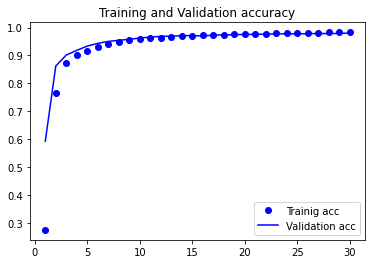

In [ ]:
acc = hist_3.history['accuracy']
val_acc = hist_3.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Trainig acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title("Training and Validation accuracy")
plt.legend()
plt.show()

In [ ]:
model_3.evaluate(test_imgs, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0615 - accuracy: 0.9823


[0.061455726623535156, 0.9822999835014343]

####  128-64-32-Flatten-64(relu)-10(softmax)/ optimizer = "adam" / epochs=30, batch_size = 64
---
과대적합 발생

손실함수가 빠르게 과대적합으로 이어지도록 하는 것이 아닌지 가정

가중치 규제나 드롭아웃 등을 활용한다면 SGD 옵티마이저보다 더 좋은 성능을 낼 수 있지 않을까 판단함.

In [ ]:
model_3_1 = keras.Sequential([
  layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(32, (3, 3), activation='relu'),
  layers.Flatten(),
  layers.Dense(64, activation = 'relu'),
  layers.Dense(10, activation = 'softmax')
])

In [ ]:
model_3_1.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
hist_3_1 = model_3_1.fit(train_imgs, train_labels, epochs=30, batch_size=64, validation_split=0.2)

Epoch 1/30
750/750 [==============================] - 5s 6ms/step - loss: 0.2108 - accuracy: 0.9344 - val_loss: 0.0704 - val_accuracy: 0.9787
Epoch 2/30
750/750 [==============================] - 4s 6ms/step - loss: 0.0585 - accuracy: 0.9819 - val_loss: 0.0542 - val_accuracy: 0.9837
Epoch 3/30
750/750 [==============================] - 4s 6ms/step - loss: 0.0417 - accuracy: 0.9870 - val_loss: 0.0513 - val_accuracy: 0.9843
Epoch 4/30
750/750 [==============================] - 4s 6ms/step - loss: 0.0324 - accuracy: 0.9897 - val_loss: 0.0410 - val_accuracy: 0.9878
Epoch 5/30
750/750 [==============================] - 4s 6ms/step - loss: 0.0268 - accuracy: 0.9911 - val_loss: 0.0472 - val_accuracy: 0.9866
Epoch 6/30
750/750 [==============================] - 4s 6ms/step - loss: 0.0224 - accuracy: 0.9927 - val_loss: 0.0367 - val_accuracy: 0.9891
Epoch 7/30
750/750 [==============================] - 4s 6ms/step - loss: 0.0178 - accuracy: 0.9942 - val_loss: 0.0635 - val_accuracy: 0.9830
Epoch 

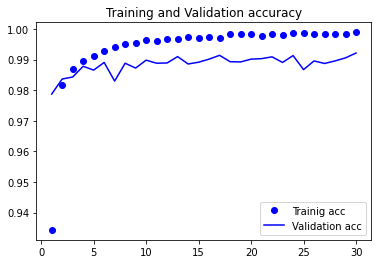

In [ ]:
acc = hist_3_1.history['accuracy']
val_acc = hist_3_1.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Trainig acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title("Training and Validation accuracy")
plt.legend()
plt.show()

In [ ]:
model_3_1.evaluate(test_imgs, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0416 - accuracy: 0.9924


[0.041623201221227646, 0.9923999905586243]

####  128-64-32-Flatten-64(sigmoid)-10(softmax)/ optimizer = "rmsprop" / epochs=30, batch_size = 128

---

validation set 예측 정확도 변동폭이 상대적으로 적음을 알 수 있음.

 optimzer 때문인지, batchsize 때문인지 확인이 필요하나, batchsize 때문일 것으로 예상함.

In [ ]:
model_3_2 = keras.Sequential([
  layers.Conv2D(128, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation='relu'),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(32, (3, 3), activation='relu'),
  layers.Flatten(),
  layers.Dense(64, activation = 'sigmoid'),
  layers.Dense(10, activation = 'softmax')
])

In [ ]:
model_3_2.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [ ]:
hist_3_2 = model_3_2.fit(train_imgs, train_labels, epochs=30, batch_size=128, validation_split=0.2)

Epoch 1/30
375/375 [==============================] - 16s 12ms/step - loss: 0.3984 - accuracy: 0.8984 - val_loss: 0.0989 - val_accuracy: 0.9732
Epoch 2/30
375/375 [==============================] - 4s 10ms/step - loss: 0.0849 - accuracy: 0.9754 - val_loss: 0.0685 - val_accuracy: 0.9812
Epoch 3/30
375/375 [==============================] - 4s 10ms/step - loss: 0.0526 - accuracy: 0.9848 - val_loss: 0.0558 - val_accuracy: 0.9828
Epoch 4/30
375/375 [==============================] - 4s 10ms/step - loss: 0.0397 - accuracy: 0.9879 - val_loss: 0.0469 - val_accuracy: 0.9858
Epoch 5/30
375/375 [==============================] - 4s 10ms/step - loss: 0.0310 - accuracy: 0.9905 - val_loss: 0.0443 - val_accuracy: 0.9872
Epoch 6/30
375/375 [==============================] - 4s 11ms/step - loss: 0.0245 - accuracy: 0.9924 - val_loss: 0.0393 - val_accuracy: 0.9876
Epoch 7/30
375/375 [==============================] - 5s 12ms/step - loss: 0.0194 - accuracy: 0.9940 - val_loss: 0.0364 - val_accuracy: 0.989

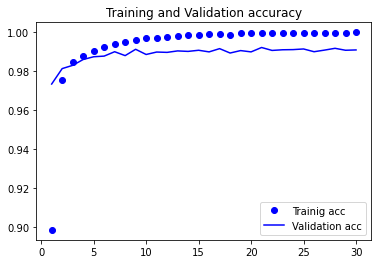

In [ ]:
acc = hist_3_2.history['accuracy']
val_acc = hist_3_2.history['val_accuracy']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Trainig acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title("Training and Validation accuracy")
plt.legend()
plt.show()

In [ ]:
model_3_2.evaluate(test_imgs, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0434 - accuracy: 0.9923


[0.04337841644883156, 0.9922999739646912]